In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
from Bio import SeqIO
import matplotlib.pyplot as plt

In [2]:
def storeScores(dictionary, sequence, qualities):
    for n,c in enumerate(sequence):
        try:
            dictionary[n].append(qualities[n])
        except:
            dictionary[n] = []
            dictionary[n].append(qualities[n])
    return dictionary
        


In [3]:
IN_FILE = '/home/jedmonston/garb/NA12878_child_1.fq'
qscores = {}
for record in SeqIO.parse(IN_FILE, "fastq"):
    qualities = record.letter_annotations["phred_quality"]
    qscores = storeScores(qscores, record.seq, qualities)

In [51]:
df = pd.DataFrame(qscores)
df.tail()
df[[1,2]]

41


/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


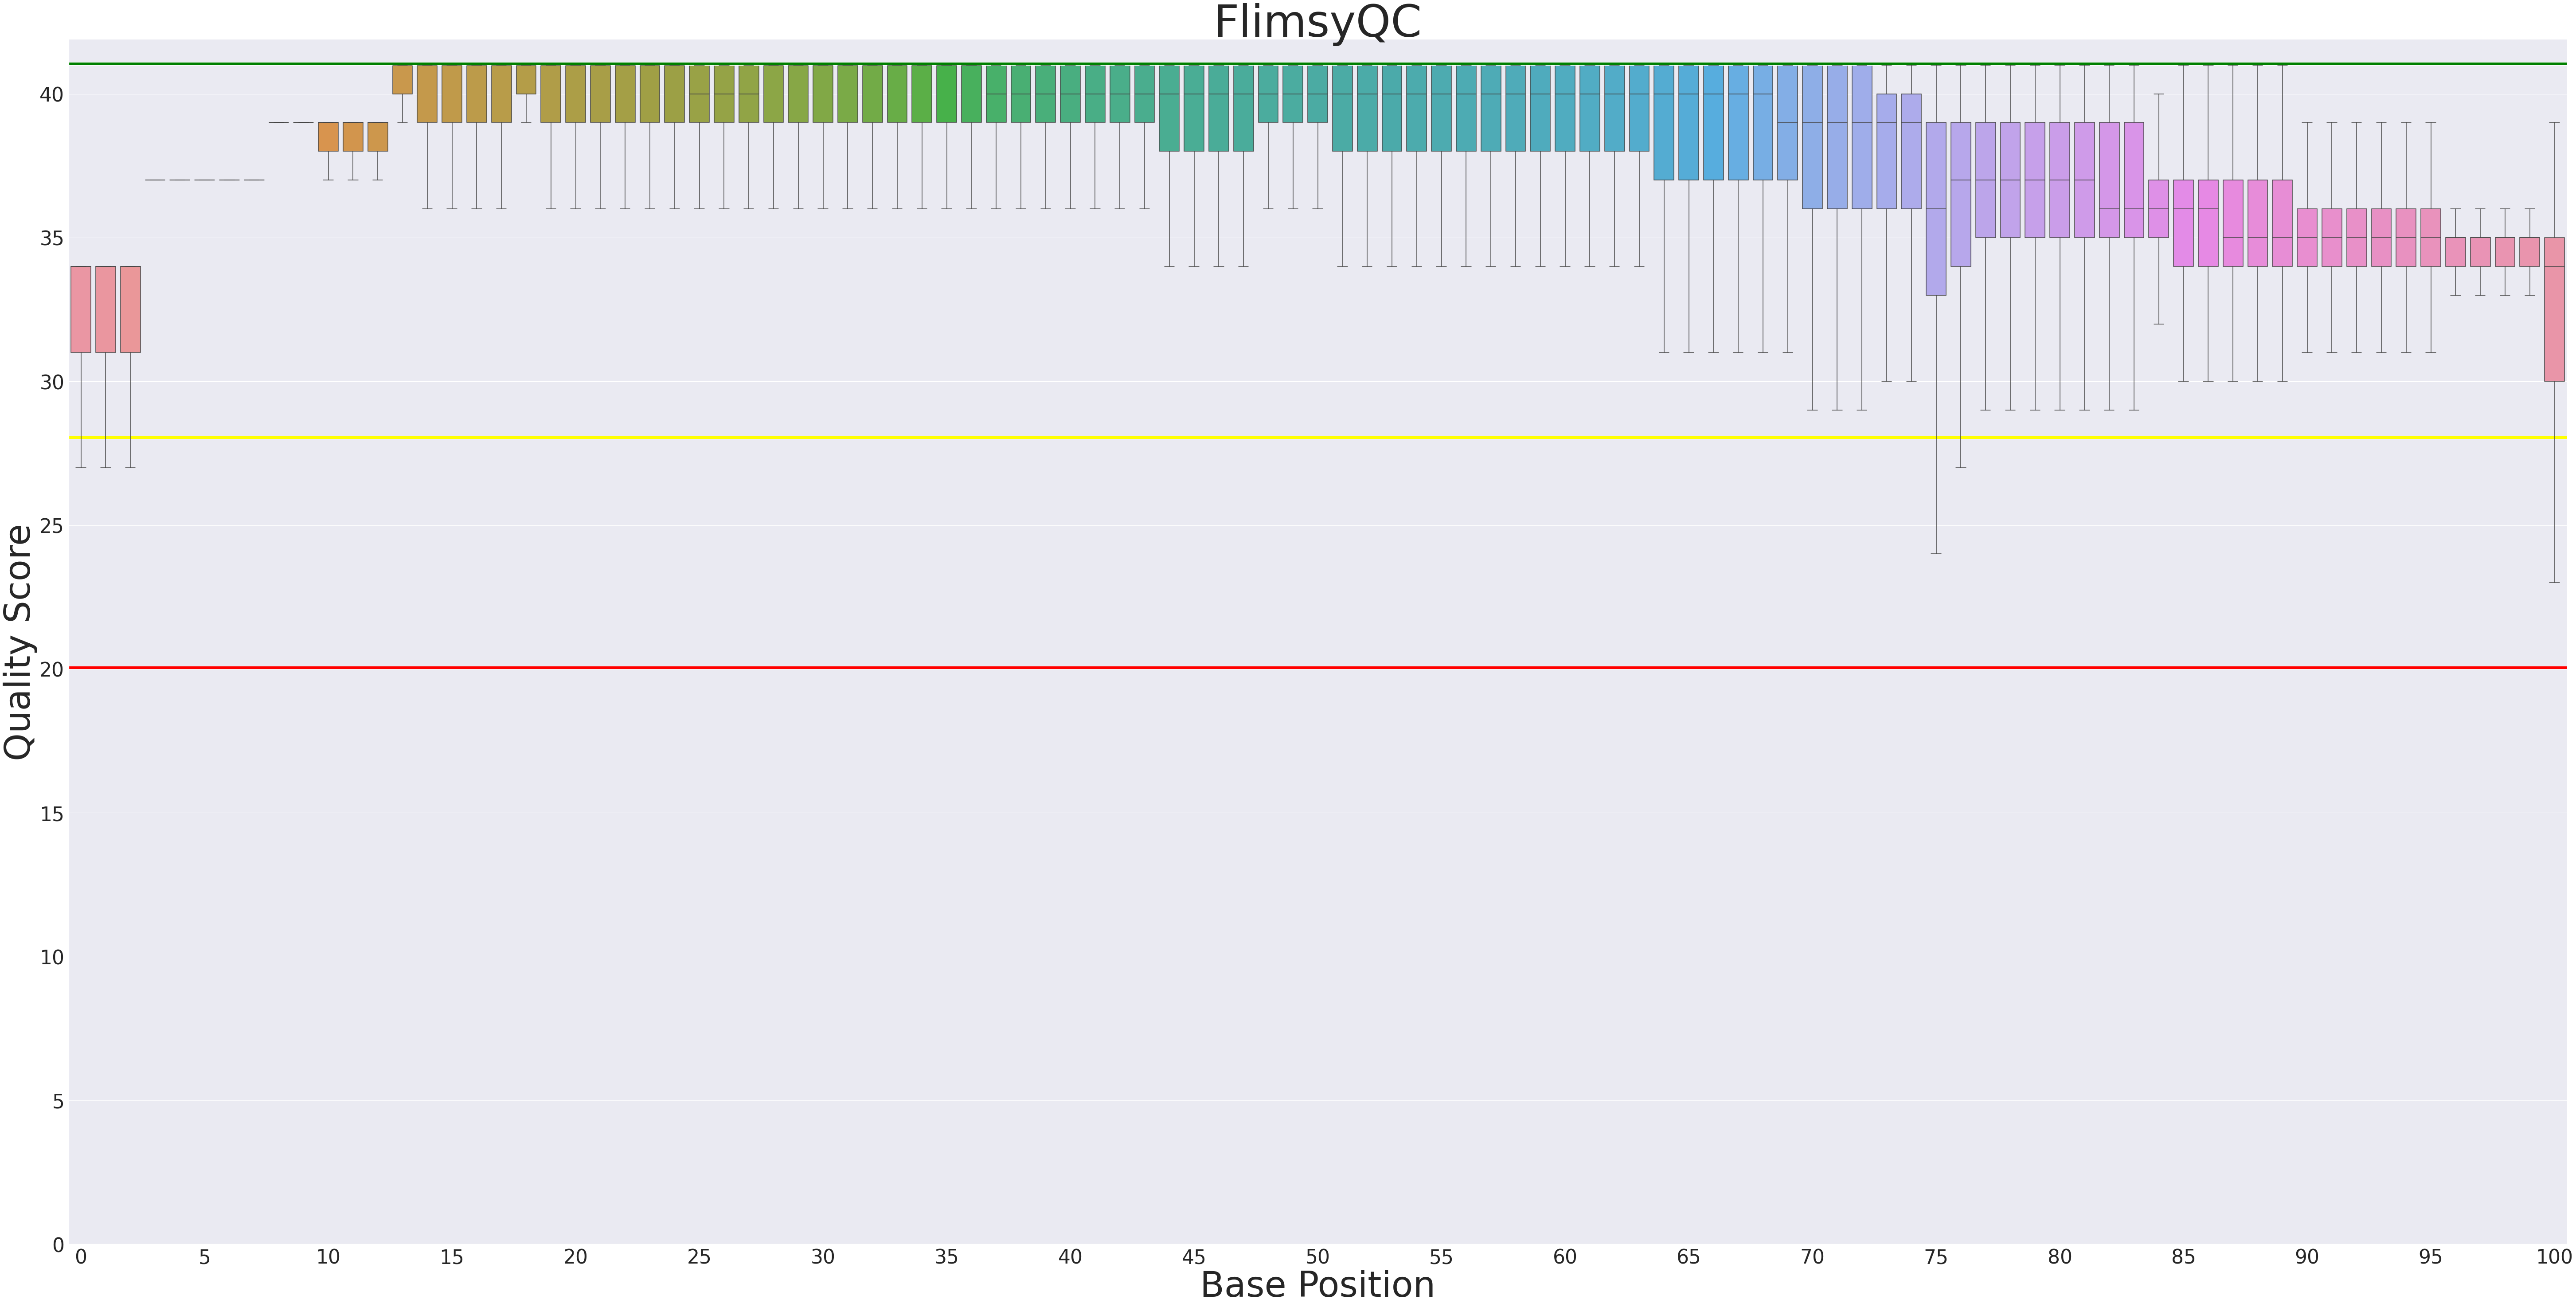

In [53]:
sns.set(font_scale = 4)


plt.figure(figsize=(101,50))
plot = sns.boxplot(data=df, showfliers = False)
plt.title('FlimsyQC', fontsize=100)
plt.xlabel('Base Position', fontsize=80)
plt.ylabel('Quality Score', fontsize=80)
plot.set_ylim(ymin=0)
for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        
    plt.axhspan(20,20.1, facecolor='red', alpha=1)
    plt.axhspan(28,28.1, facecolor='yellow', alpha=1)
    plt.axhspan(41,41.1, facecolor='green', alpha=1)